__Permutation Test__  
Average non-pathological brain age gap vs. average pathological brain age gap

In [1]:
import sys
sys.path.insert(0, '/home/jovyan/braindecode/')
sys.path.insert(0, '/home/jovyan/mne-python/')
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_color_codes('deep')
from sklearn.metrics import mean_absolute_error, balanced_accuracy_score

from decode_tueg import plot_violin, age_gap_diff_permutations, accuracy_perumtations

In [2]:
subject_wise = True
longitudinal = 'transition'
df = pd.read_csv(f'/home/jovyan/220824_5fcv_huber_longitudinal_{longitudinal}.csv', index_col=0)
# --- hack
with open(f'/home/jovyan/longitudinal/{longitudinal}.pkl', 'rb') as f:
    ds = pickle.load(f)
df['subject'] = 5*ds.description['subject'].to_list()
# ---

In [3]:
df['gap'] = df.y_true - df.y_pred

In [4]:
df

,y_pred,y_true,pathological,exp,split,fold,subject,gap
0,86.959764,48.999998,True,220824144055632350,transition,0,5,-37.959766
1,27.609126,48.999998,True,220824144055632350,transition,0,5,21.390871
2,29.524880,50.000002,True,220824144055632350,transition,0,5,20.475121
3,17.565459,51.000000,False,220824144055632350,transition,0,5,33.434541
4,55.629012,51.999999,True,220824144055632350,transition,0,5,-3.629013
...,...,...,...,...,...,...,...,...
16780,41.147793,43.000000,True,220824144141880751,transition,4,14951,1.852207
16781,35.264888,43.000000,True,220824144141880751,transition,4,14951,7.735113
16782,37.178147,43.000000,True,220824144141880751,transition,4,14951,5.821853
16783,30.927182,43.000000,True,220824144141880751,transition,4,14951,12.072819


In [21]:
n_repetitions = 100000

In [22]:
y, sampled_y = age_gap_diff_permutations(df=df, n_repetitions=n_repetitions, subject_wise=False)

In [55]:
# what is the p-value?

In [23]:
y

2.133356909757584

In [24]:
p = np.min([
    ((sampled_y >= y).sum() / len(sampled_y)),
    ((sampled_y <= y).sum() / len(sampled_y)),
])

In [25]:
if p == 0:
    p = 1/n_repetitions
    print(f'p < 1E{np.floor(np.log10(p)).astype(int)}')

p < 1E-6


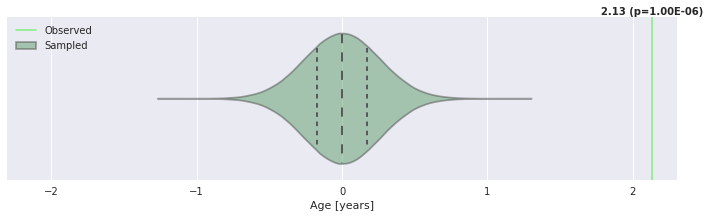

In [27]:
ax = plot_violin(
    y, 
    sampled_y,
    p,
    xlabel='Age [years]',
)
s = 'subj' if subject_wise else 'recs'
# ax.get_figure().savefig(
#     f'/home/jovyan/permutation_test_longitudinal_{longitudinal}_{s}.png', bbox_inches='tight', dpi=300)

In [73]:
y, sampled_y = age_gap_diff_permutations(df=df, n_repetitions=n_repetitions, subject_wise=True)

In [74]:
y

-0.6168601298438041

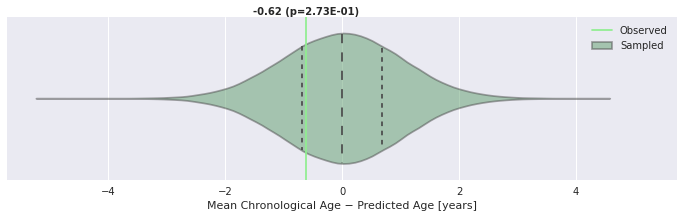

In [75]:
ax = plot_violin(
    y,
#     np.float64(+.68), 
    sampled_y,
    xlabel='Age [years]',
)
# ax.set_xlabel('Mean Brain Age Gap Difference [years]')
ax.set_xlabel('Mean Chronological Age − Predicted Age [years]')
s = 'subj' if subject_wise else 'recs'
# ax.get_figure().savefig(
#     f'/home/jovyan/permutation_test_longitudinal_{longitudinal}_{s}.png', bbox_inches='tight', dpi=300)

In [92]:
1.27E-2

0.0127

In [93]:
p = np.min([
    ((sampled_y >= y).sum() / len(sampled_y)),
    ((sampled_y <= y).sum() / len(sampled_y)),
])

In [101]:
f'p ~ {p}, p < 1E{np.ceil(np.log10(p)).astype(int)}'

'p ~ 0.27257, p < 1E0'

In [91]:
1e-1

0.1

__permutation test proxy acc__

In [7]:
df = pd.read_csv('/home/jovyan/220824_5fcv_huber.csv', index_col=0)
# only look at valid set
df = df[df.split=='valid']
df = df[df.subset=='mixed']

In [8]:
mean_absolute_error(df.y_true, df.y_pred)

9.395337378707762

In [9]:
n_repetitions = 100000

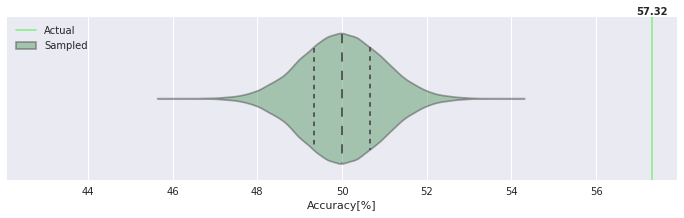

In [10]:
ax = plot_violin(
    *(accuracy_perumtations(df, n_repetitions)),
    xlabel='Accuracy[%]',
    center_value=50,
)
# ax.get_figure().savefig('/home/jovyan/permutation_test_proxy.png', bbox_inches='tight', dpi=300)